In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [29]:
"""given volume, number density, and representative power spectrum value,
    return the expected precision of the CF estimation: equation from Weinberg OSU"""
def std_grad(V, n, P):
    std = P * (V**(-.5) * (1 + (n*P)**(-1))) * (V**(-1/3))  # last factor is from position dependence across box
    return std

In [30]:
def std_cf(V, n, P):
    std = P * (V**(-.5) * (1 + (n*P)**(-1)))
    return std

In [4]:
# input power spectrum: this is used to generate the lognormal catalogs
def load_Pk(cat_tag):
    Pk = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_pk.txt').T
    return Pk

In [5]:
# galaxy power spectrum
def load_PkG(cat_tag):
    PkG = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_pkG.dat').T
    return PkG

In [6]:
# Pk SHOULD be the same between cat tags, let's check:
cat_tag = 'L750_n2e-4_z057_patchy'
k2x, Pk2x = load_Pk(f'{cat_tag}_As2x')
k1x, Pk1x = load_Pk(cat_tag)

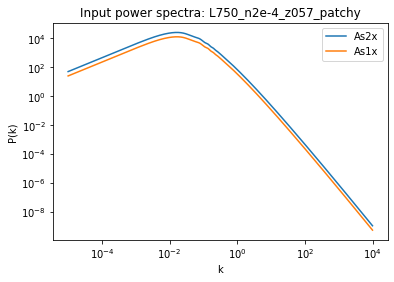

In [7]:
fig, ax = plt.subplots()

ax.plot(k2x, Pk2x, label='As2x')
ax.plot(k1x, Pk1x, label='As1x')

ax.set_title(f'Input power spectra: {cat_tag}')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
plt.legend()

Different volume and number density parameters don't affect the input power spectra used to generate the catalog– only the amplitude does

#### picking a representative P value

I think we want to use the galaxy power spectrum here, but let's understand how $P(k)$ compares to $P_G(k)$.

In [8]:
# use L750 & n2e-4 as our fiducial mock parameters
k, Pk = load_Pk('L750_n2e-4_z057_patchy_As2x')
kG, PkG = load_PkG('L750_n2e-4_z057_patchy_As2x')

In [9]:
# let's naively take the value of the galaxy power spectrum at r=40
r_rep = 40
k_rep = 1/r_rep
k_rep = min(kG, key=lambda x:abs(x-k_rep))  # closest r value to 40
P_rep = PkG[np.where(kG==k_rep)]
k_rep, P_rep

(0.02511886432, array([76730.64364]))

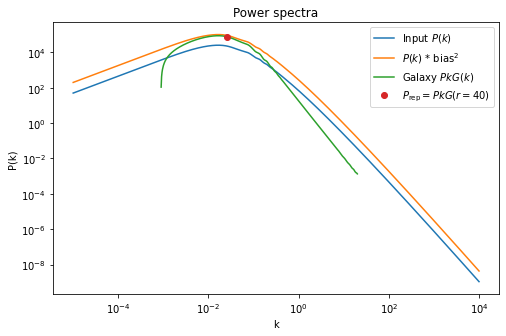

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

bias = 2.0
ax.plot(k, Pk, label='Input $P(k)$')
ax.plot(k, Pk*bias**2, label='$P(k)$ * bias$^2$')
ax.plot(kG, PkG, label='Galaxy $PkG(k)$')

ax.plot(k_rep, P_rep, marker='o', ls='None', label='$P_{\mathrm{rep}} = PkG(r=40)$')

ax.set_title('Power spectra')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
plt.legend()

It seems like at least in the range we care about, $P_G(k)=P(k) * \textrm{bias}^2$

#### expected precision scalings with boxsize

In [11]:
# gradient parameters
m = 1
b = 0.5

In [12]:
Ls_cont = np.linspace(500, 2000, 100)   # for a continuous curve
scalings_L = std_grad(Ls_cont**3, 2e-4, P_rep)

In [26]:
Ls_data = [500, 750, 1000, 1500]

Text(0.5, 0.98, 'Expected scalings')

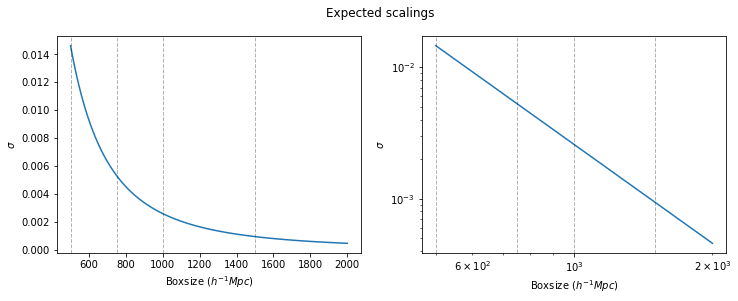

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for ax in axs:
    ax.plot(Ls_cont, scalings_L)
    
    for L in Ls_data:
        ax.axvline(L, color='k', ls='--', alpha=0.3, lw=1)

    ax.set_xlabel('Boxsize ($h^{-1}Mpc$)')
    ax.set_ylabel('$\sigma$')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
fig.suptitle('Expected scalings')

#### expected precision scalings with number density

In [14]:
# gradient parameters
m = 1
b = 0.5

In [19]:
ns_cont = np.logspace(np.log10(1e-6), np.log10(1e-2), 100)   # for a continuous curve
scalings_n = std_grad(750**3, ns_cont, P_rep)

In [24]:
ns_data = [1e-5, 1e-4, 2e-4, 4e-4]

Text(0.5, 0.98, 'Expected scalings')

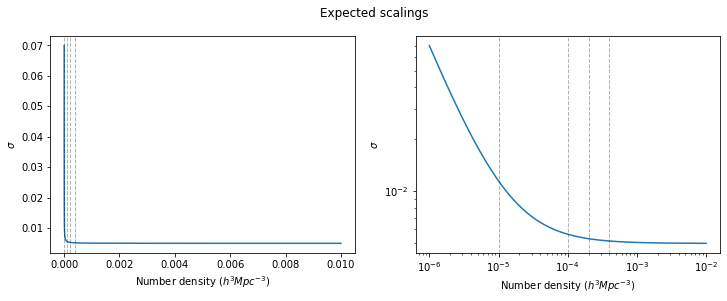

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for ax in axs:
    ax.plot(ns_cont, scalings_n)
    
    for n in ns_data:
        ax.axvline(n, color='k', ls='--', alpha=0.3, lw=1)

    ax.set_xlabel('Number density ($h^3 Mpc^{-3}$)')
    ax.set_ylabel('$\sigma$')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
fig.suptitle('Expected scalings')